<a href="https://colab.research.google.com/github/RubaEgbaria/Data-Processing-/blob/master/Assignment_1_Data_mining_Part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.Preprocess the table from missing, outlier, duplicate, etc.


In [1]:
import pandas as pd
processedData = pd.read_csv('processedTable.csv')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to detect and visualize outliers
def detect_outliers(df, feature):
    plt.figure(figsize=(14, 6))

    # Scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(df.index, df[feature], label='Data Points')
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel(feature)

    # Calculate quartiles and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    iqr_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    plt.scatter(iqr_outliers.index, iqr_outliers[feature], color='red', label='IQR Outliers')

    # Calculate z-scores
    df['z_score'] = (df[feature] - df[feature].mean()) / df[feature].std()
    z_score_outliers = df[np.abs(df['z_score']) > 3]

    plt.scatter(z_score_outliers.index, z_score_outliers[feature], color='orange', label='Z-score Outliers')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

    plt.show()

    # So we don't drop an important data or entities we calculated the outliers based on both z score and IQR
    combined_outliers = pd.concat([iqr_outliers, z_score_outliers]).drop_duplicates()

    return combined_outliers

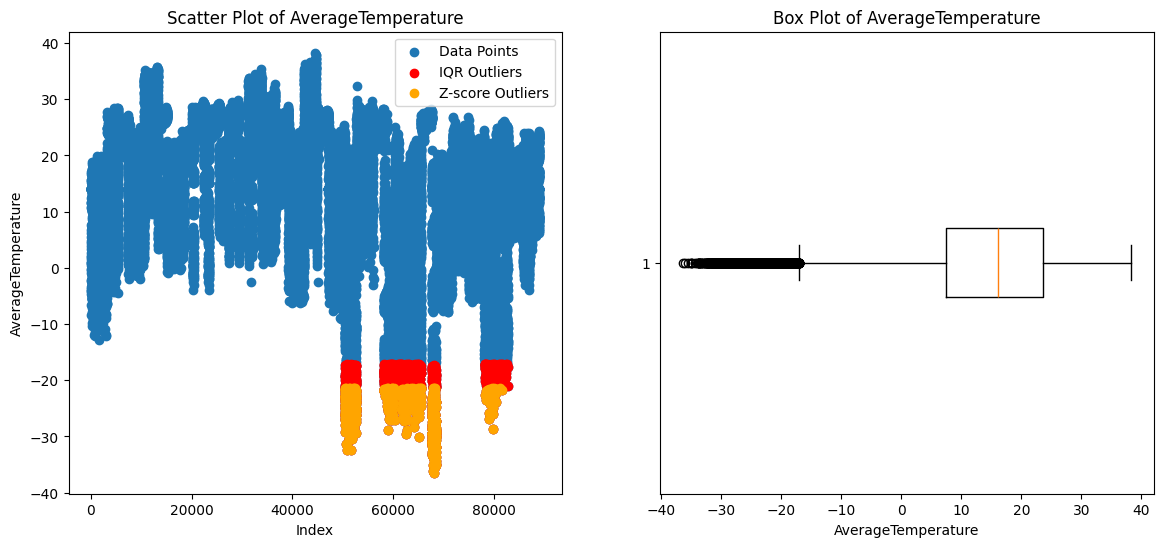

Number of outliers: 2832


In [3]:
outliers = detect_outliers(processedData, 'AverageTemperature')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

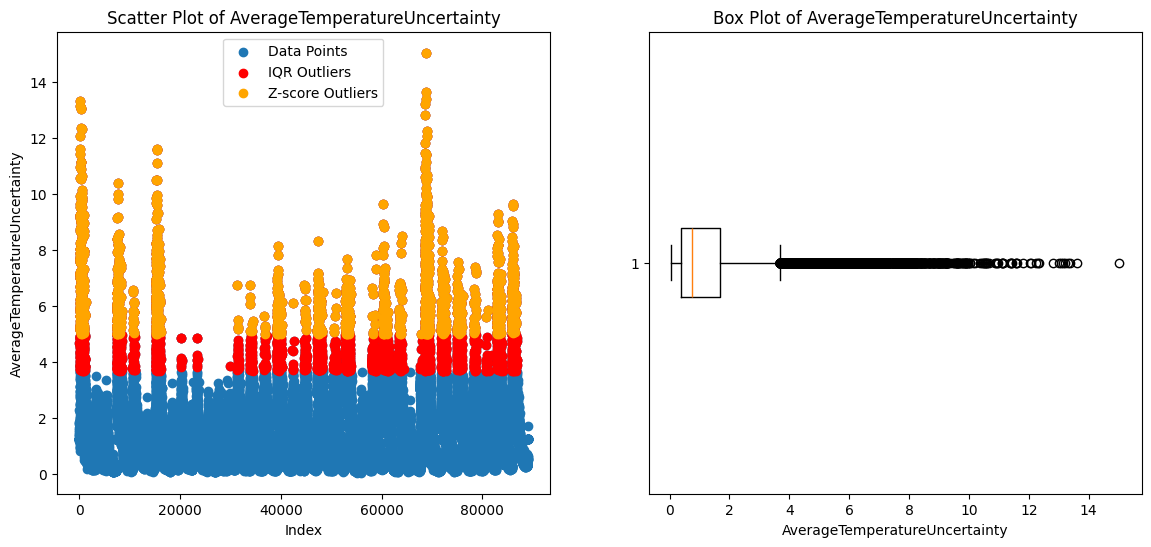

Number of outliers: 6089


In [4]:
# AverageTemperatureUncertainty
outliers = detect_outliers(processedData, 'AverageTemperatureUncertainty')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

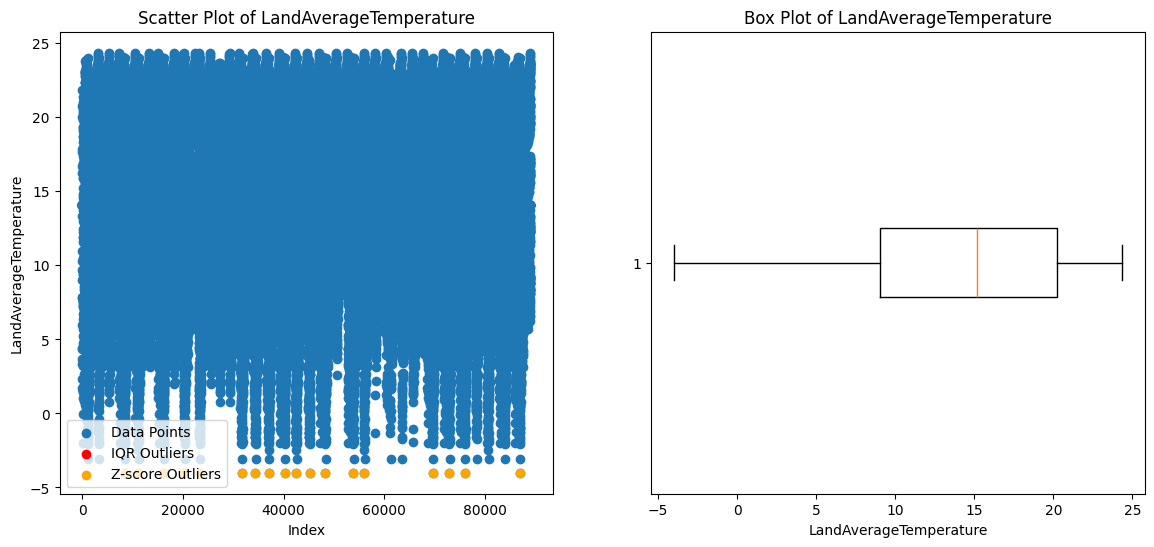

Number of outliers: 18


In [5]:
# 'LandAverageTemperature'
outliers = detect_outliers(processedData, 'LandAverageTemperature')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

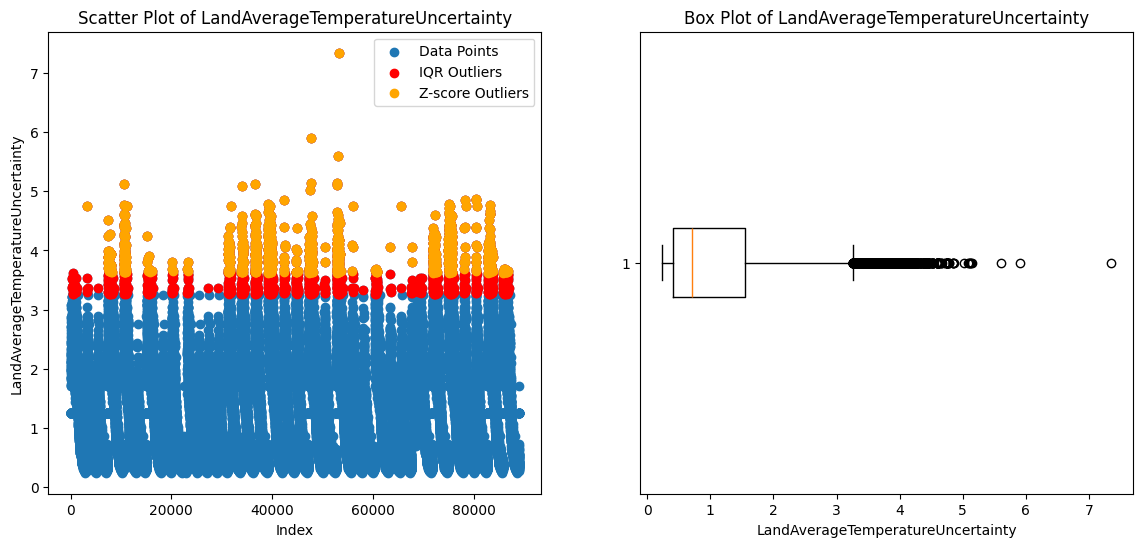

Number of outliers: 2635


In [6]:
 #'LandAverageTemperatureUncertainty'

outliers = detect_outliers(processedData, 'LandAverageTemperatureUncertainty')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


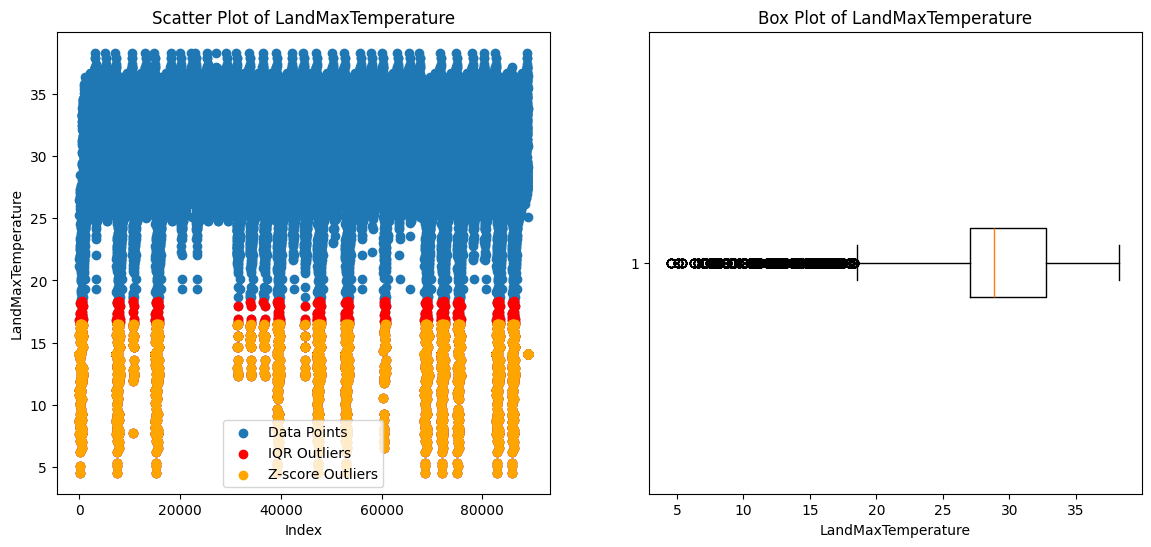

Number of outliers: 3843


In [7]:
# 'LandMaxTemperature'
outliers = detect_outliers(processedData, 'LandMaxTemperature')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

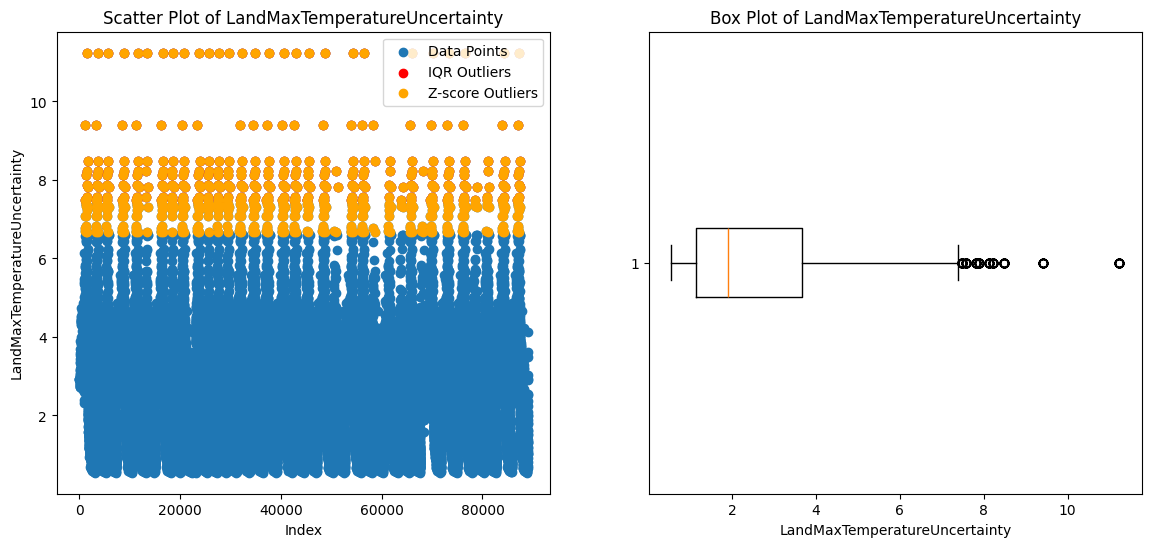

Number of outliers: 886


In [8]:
# LandMaxTemperatureUncertainty
outliers = detect_outliers(processedData, 'LandMaxTemperatureUncertainty')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

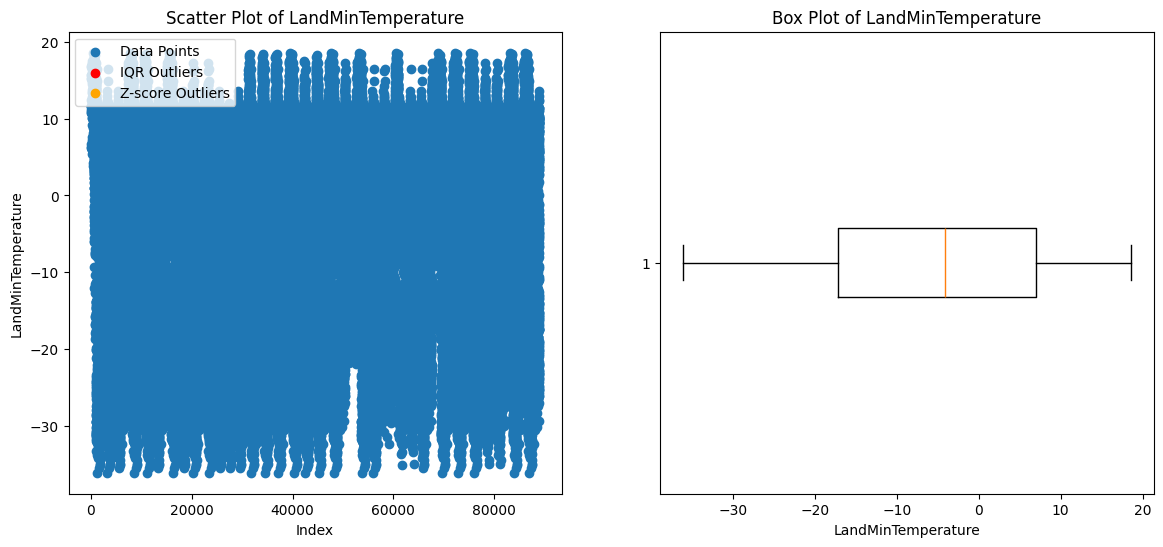

Number of outliers: 0


In [9]:
# 'LandMinTemperature'
outliers = detect_outliers(processedData, 'LandMinTemperature')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

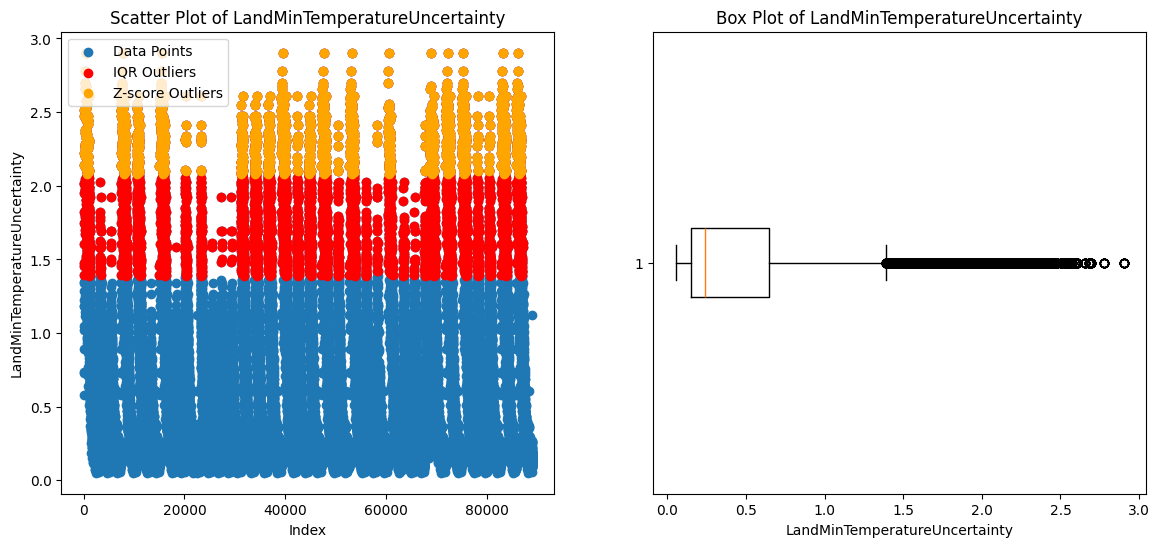

Number of outliers: 8578


In [10]:
#  'LandMinTemperatureUncertainty'
outliers = detect_outliers(processedData, 'LandMinTemperatureUncertainty')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

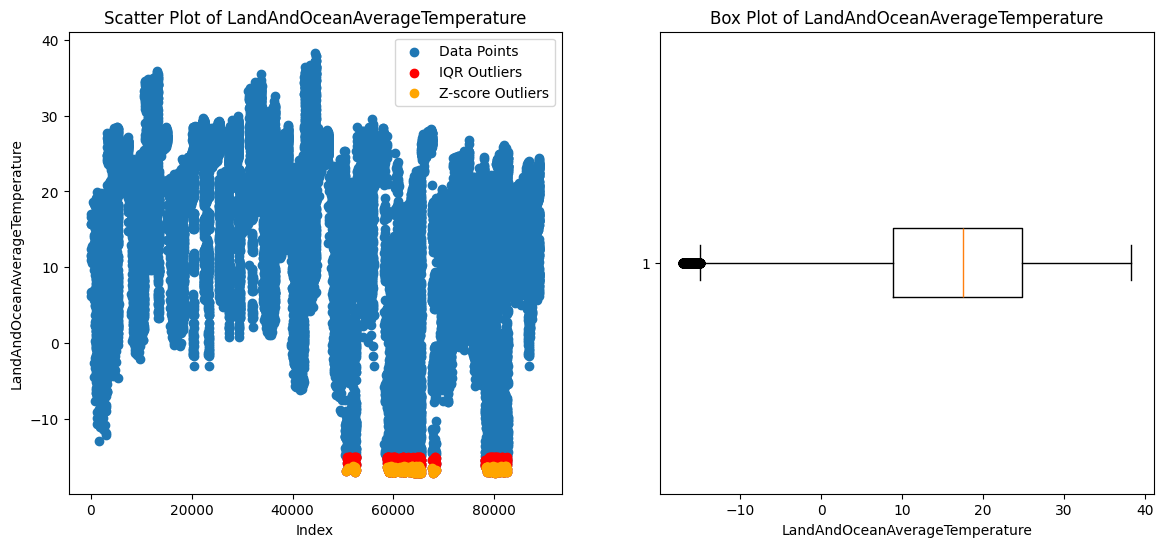

Number of outliers: 872


In [11]:
# 'LandAndOceanAverageTemperature',
outliers = detect_outliers(processedData, 'LandAndOceanAverageTemperature')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

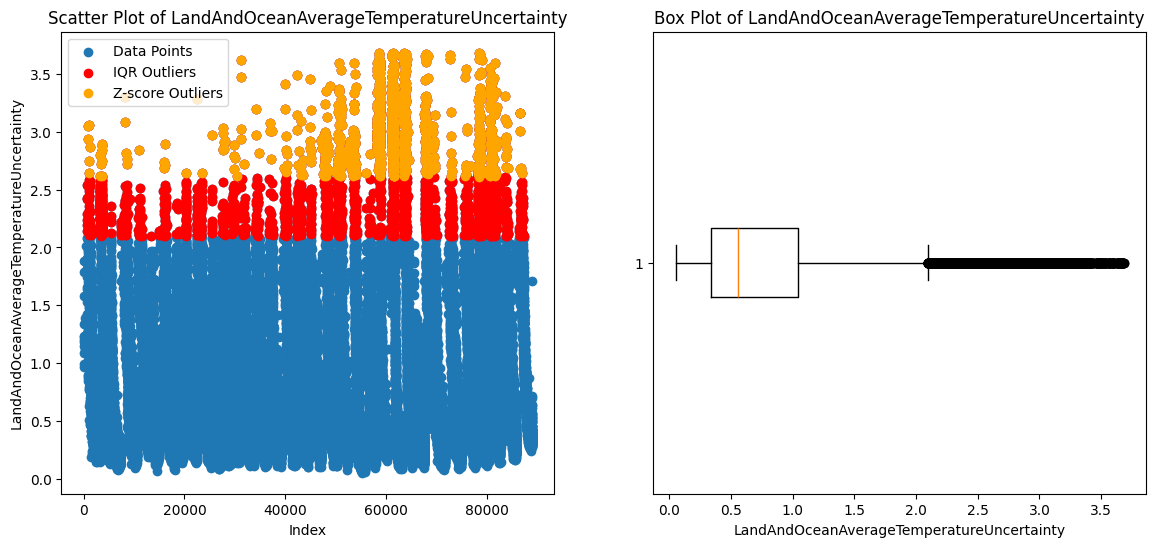

Number of outliers: 4382


In [12]:
# 'LandAndOceanAverageTemperatureUncertainty'
outliers = detect_outliers(processedData, 'LandAndOceanAverageTemperatureUncertainty')
processedData.drop(outliers.index, inplace=True)

# num of outliers
print(f"Number of outliers: {len(outliers)}")

In [13]:
# Num of entities
processedData.count()

,0
dt,67068
AverageTemperature,67068
AverageTemperatureUncertainty,67068
Country,67068
City,67068
Latitude,67068
Longitude,67068
State,67068
LandAverageTemperature,67068
LandAverageTemperatureUncertainty,67068


# 5.Encode the date “dt” columns into three columns (year, month, day)


In [14]:
dtCol = pd.to_datetime(processedData['dt'], errors='coerce', format='%Y-%m-%d')

# save the encoded values
processedData['year'] = dtCol.dt.year.astype(int)
processedData['month'] = dtCol.dt.month.astype(int)
processedData['day'] = dtCol.dt.day.astype(int)

processedData.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,z_score,year,month,day
6,1744-05-01,6.702,1.789,Åland,unknown,0,0,unknown,13.345250,2.107250,21.197,2.920,6.702,1.283,6.702,1.789,1.651412,1744,5,1
7,1744-06-01,11.609,1.577,Åland,unknown,0,0,unknown,17.624125,2.085875,25.290,2.928,11.609,1.347,11.609,1.577,1.304128,1744,6,1
78,1750-05-01,6.265,1.339,Åland,unknown,0,0,unknown,14.137286,1.946000,21.966,2.823,6.265,1.339,6.265,1.339,0.914253,1750,5,1
79,1750-06-01,12.408,1.204,Åland,unknown,0,0,unknown,17.871857,1.860143,24.568,2.800,12.408,1.181,12.408,1.204,0.693105,1750,6,1
80,1750-07-01,16.683,1.184,Åland,unknown,0,0,unknown,21.867714,1.829571,28.464,2.787,16.683,1.184,16.683,1.184,0.660342,1750,7,1


# 6.Standardize or normalize the data if necessary

In [15]:
normalizedData = processedData.copy()

In [16]:
normalizedData.describe()
# so we know the ranges of the features and see if normalization is needed

,AverageTemperature,AverageTemperatureUncertainty,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,z_score,year,month,day
count,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.0
mean,16.401058,0.695879,15.091277,0.774750,30.135720,2.084175,-5.832724,0.336603,16.401058,0.695879,-0.139265,1927.741158,6.569303,1.0
std,10.030504,0.474846,5.796044,0.503742,3.158484,1.244025,12.955961,0.288162,10.030504,0.474846,0.777861,51.558697,3.335726,0.0
min,-14.960000,0.052000,-3.043478,0.240235,20.131000,0.542000,-35.518000,0.052000,-14.960000,0.052000,-1.194024,1744.000000,1.000000,1.0
25%,9.674750,0.330000,9.744576,0.390844,27.318000,1.061000,-17.420000,0.146000,9.674750,0.330000,-0.738623,1887.000000,4.000000,1.0
50%,18.072576,0.531000,15.749242,0.562091,29.645000,1.619000,-4.858000,0.209000,18.072576,0.531000,-0.409358,1930.000000,7.000000,1.0
75%,25.045000,0.946106,20.601273,1.005382,33.045000,3.025000,6.660000,0.411000,25.045000,0.946106,0.270640,1972.000000,9.000000,1.0
max,38.283000,2.095286,24.359387,3.163562,38.283000,6.598000,18.589000,1.388000,38.283000,2.095286,2.153149,2013.000000,12.000000,1.0


In [17]:
# based on the min and max of the features above, obviously those features do need normalization
# to ensure the data have same scaling for all features
# 1. AverageTemperature
# 2. AverageTemperatureUncertainty
# 3. LandAverageTemperature
# 4. LandAverageTemperatureUncertainty
# 5. LandMaxTemperature
# 6. LandMaxTemperatureUncertainty
# 7. LandMinTemperature
# 8. LandMinTemperatureUncertainty
# 9. LandAndOceanAverageTemperature
# 10. LandAndOceanAverageTemperatureUncertainty
# 11. z_score

In [18]:
# normalize
normalizedData['AverageTemperature'] = (normalizedData['AverageTemperature'] - normalizedData['AverageTemperature'].min()) / (normalizedData['AverageTemperature'].max() - normalizedData['AverageTemperature'].min())
normalizedData['AverageTemperatureUncertainty'] = (normalizedData['AverageTemperatureUncertainty'] - normalizedData['AverageTemperatureUncertainty'].min()) / (normalizedData['AverageTemperatureUncertainty'].max() - normalizedData['AverageTemperatureUncertainty'].min())
normalizedData['LandAverageTemperature'] = (normalizedData['LandAverageTemperature'] - normalizedData['LandAverageTemperature'].min()) / (normalizedData['LandAverageTemperature'].max() - normalizedData['LandAverageTemperature'].min())
normalizedData['LandAverageTemperatureUncertainty'] = (normalizedData['LandAverageTemperatureUncertainty'] - normalizedData['LandAverageTemperatureUncertainty'].min()) / (normalizedData['LandAverageTemperatureUncertainty'].max() - normalizedData['LandAverageTemperatureUncertainty'].min())
normalizedData['LandMaxTemperature'] = (normalizedData['LandMaxTemperature'] - normalizedData['LandMaxTemperature'].min()) / (normalizedData['LandMaxTemperature'].max() - normalizedData['LandMaxTemperature'].min())
normalizedData['LandMaxTemperatureUncertainty'] = (normalizedData['LandMaxTemperatureUncertainty'] - normalizedData['LandMaxTemperatureUncertainty'].min()) / (normalizedData['LandMaxTemperatureUncertainty'].max() - normalizedData['LandMaxTemperatureUncertainty'].min())
normalizedData['LandMinTemperature'] = (normalizedData['LandMinTemperature'] - normalizedData['LandMinTemperature'].min()) / (normalizedData['LandMinTemperature'].max() - normalizedData['LandMinTemperature'].min())
normalizedData['LandMinTemperatureUncertainty'] = (normalizedData['LandMinTemperatureUncertainty'] - normalizedData['LandMinTemperatureUncertainty'].min()) / (normalizedData['LandMinTemperatureUncertainty'].max() - normalizedData['LandMinTemperatureUncertainty'].min())
normalizedData['LandAndOceanAverageTemperature'] = (normalizedData['LandAndOceanAverageTemperature'] - normalizedData['LandAndOceanAverageTemperature'].min()) / (normalizedData['LandAndOceanAverageTemperature'].max() - normalizedData['LandAndOceanAverageTemperature'].min())
normalizedData['LandAndOceanAverageTemperatureUncertainty'] = (normalizedData['LandAndOceanAverageTemperatureUncertainty'] - normalizedData['LandAndOceanAverageTemperatureUncertainty'].min()) / (normalizedData['LandAndOceanAverageTemperatureUncertainty'].max() - normalizedData['LandAndOceanAverageTemperatureUncertainty'].min())
normalizedData['z_score'] = (normalizedData['z_score'] - normalizedData['z_score'].min()) / (normalizedData['z_score'].max() - normalizedData['z_score'].min())
normalizedData.describe()

,AverageTemperature,AverageTemperatureUncertainty,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,z_score,year,month,day
count,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.000000,67068.0
mean,0.589017,0.315119,0.661783,0.182845,0.551163,0.254652,0.548640,0.213026,0.589017,0.315119,0.315119,1927.741158,6.569303,1.0
std,0.188391,0.232394,0.211512,0.172318,0.174002,0.205420,0.239451,0.215690,0.188391,0.232394,0.232394,51.558697,3.335726,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1744.000000,1.000000,1.0
25%,0.462685,0.136055,0.466668,0.051520,0.395934,0.085700,0.334485,0.070359,0.462685,0.136055,0.136055,1887.000000,4.000000,1.0
50%,0.620412,0.234426,0.685794,0.110099,0.524130,0.177840,0.566655,0.117515,0.620412,0.234426,0.234426,1930.000000,7.000000,1.0
75%,0.751366,0.437582,0.862857,0.261738,0.711437,0.410007,0.779529,0.268713,0.751366,0.437582,0.437582,1972.000000,9.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,12.000000,1.0


# 7.Visualize the relation between avrgtemp and tempuncerinty

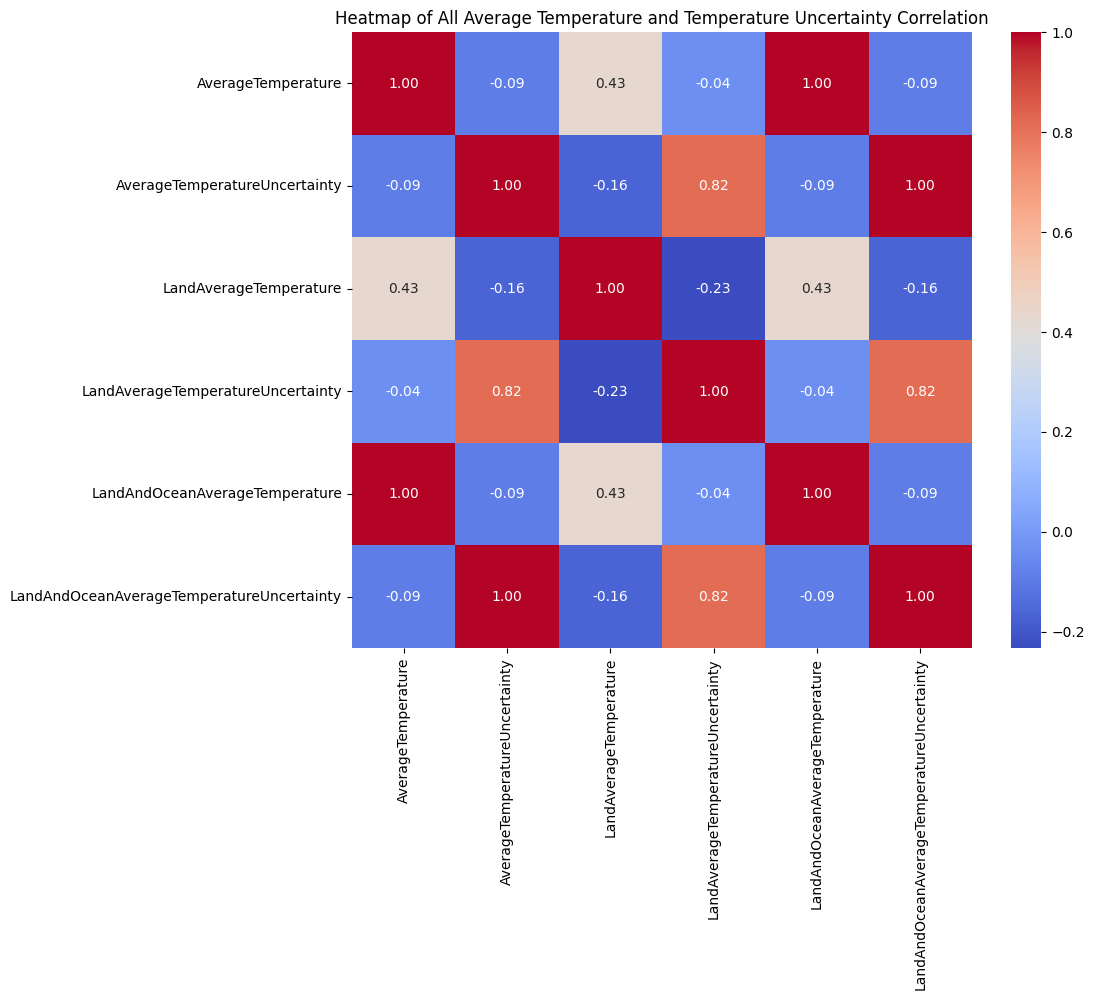

In [19]:
# heat map between all avg temps and their uncertainty
# 1. AverageTemperature
# 2. AverageTemperatureUncertainty
# 3. LandAverageTemperature
# 4. LandAverageTemperatureUncertainty
# 9. LandAndOceanAverageTemperature
# 10. LandAndOceanAverageTemperatureUncertainty

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(normalizedData[['AverageTemperature', 'AverageTemperatureUncertainty', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of All Average Temperature and Temperature Uncertainty Correlation')
plt.show()

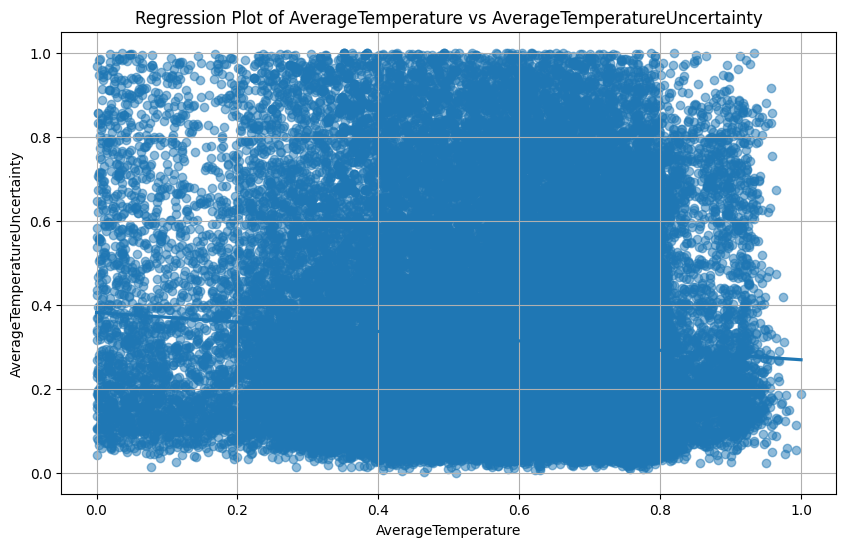

In [20]:
# Regression plot
# AverageTemperature vs AverageTemperatureUncertainty
plt.figure(figsize=(10, 6))
sns.regplot(x='AverageTemperature', y='AverageTemperatureUncertainty', data=normalizedData, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of AverageTemperature vs AverageTemperatureUncertainty')
plt.xlabel('AverageTemperature')
plt.ylabel('AverageTemperatureUncertainty')
plt.grid(True)
plt.show()

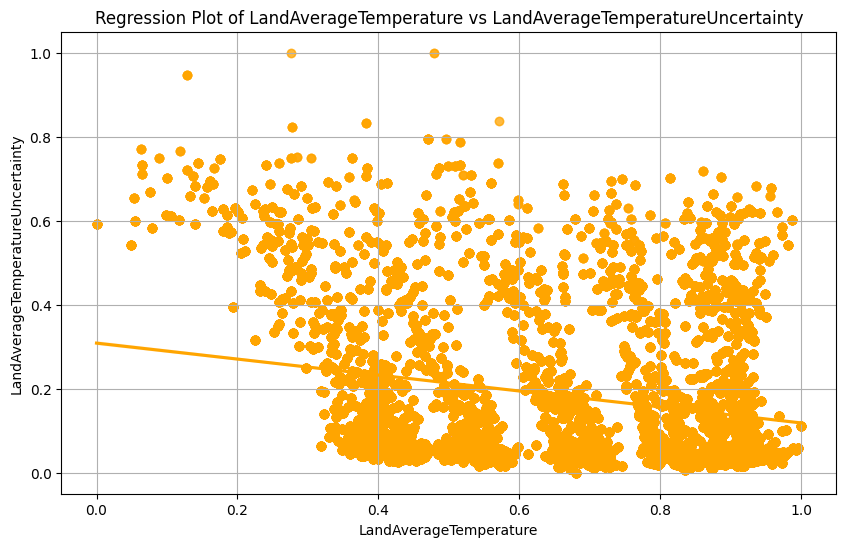

In [21]:
# Regression plot
# LandAverageTemperature vs LandAverageTemperatureUncertainty
plt.figure(figsize=(10, 6))
sns.regplot(x='LandAverageTemperature', y='LandAverageTemperatureUncertainty', data=normalizedData,color='orange', scatter_kws={'alpha':0.5})
plt.title('Regression Plot of LandAverageTemperature vs LandAverageTemperatureUncertainty')
plt.xlabel('LandAverageTemperature')
plt.ylabel('LandAverageTemperatureUncertainty')
plt.grid(True)
plt.show()

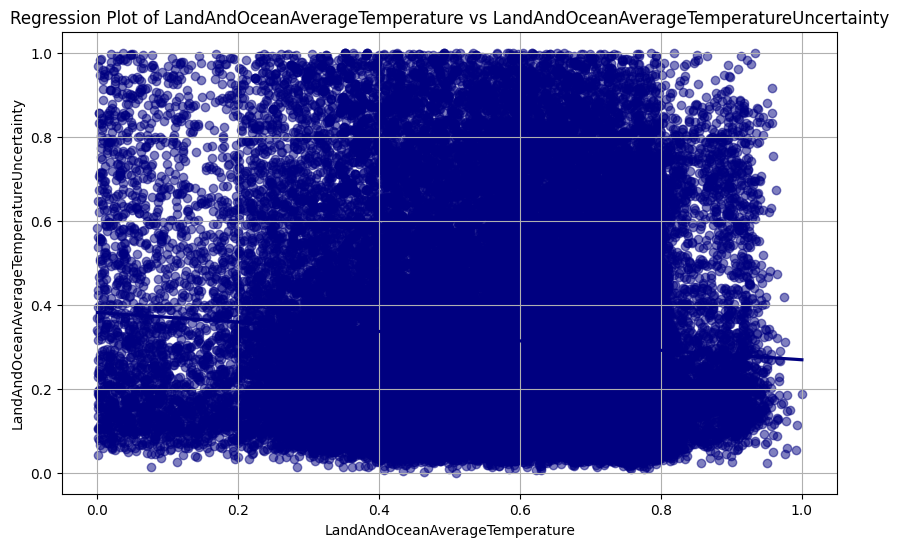

In [22]:
# Regression plot
# LandAndOceanAverageTemperature vs LandAndOceanAverageTemperatureUncertainty
plt.figure(figsize=(10, 6))
sns.regplot(x='LandAndOceanAverageTemperature', y='LandAndOceanAverageTemperatureUncertainty', data=normalizedData,color='navy', scatter_kws={'alpha':0.5})
plt.title('Regression Plot of LandAndOceanAverageTemperature vs LandAndOceanAverageTemperatureUncertainty')
plt.xlabel('LandAndOceanAverageTemperature')
plt.ylabel('LandAndOceanAverageTemperatureUncertainty')
plt.grid(True)
plt.show()

# 8.Group data based on city, country, state


In [23]:
# K-means clustering of the normalizedData based on city, country, state

# first let's encode the variables, since we can not use Strings here, we need numircal representation

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

encodedData = normalizedData.copy()

encodedData['City'] = labelEncoder.fit_transform(encodedData['City'])
encodedData['Country'] = labelEncoder.fit_transform(encodedData['Country'])
encodedData['State'] = labelEncoder.fit_transform(encodedData['State'])
encodedData[['Country', 'City', 'State']].head()

,Country,City,State
6,27,9,10
7,27,9,10
78,27,9,10
79,27,9,10
80,27,9,10


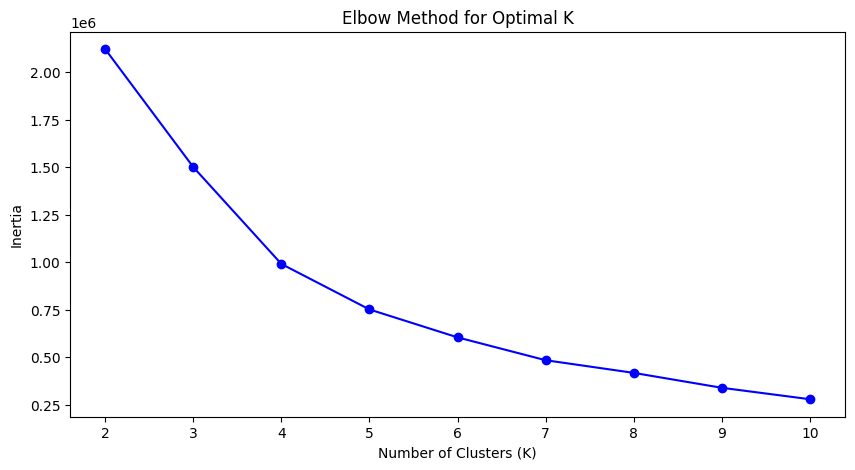

In [24]:
# use the elbow method to see what is the best number of clusters K

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia_values = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    random_state=42)
    kmeans.fit(encodedData[['City', 'Country', 'State']])
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(encodedData[['City', 'Country', 'State']], kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [25]:
# k means grouping
kmeans = KMeans(n_clusters=4,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=42)
kmeans.fit(encodedData[['City', 'Country', 'State']])
encodedData['Cluster'] = kmeans.labels_
encodedData[['City', 'Country', 'State', 'Cluster']].head()

,City,Country,State,Cluster
6,9,27,10,0
7,9,27,10,0
78,9,27,10,0
79,9,27,10,0
80,9,27,10,0


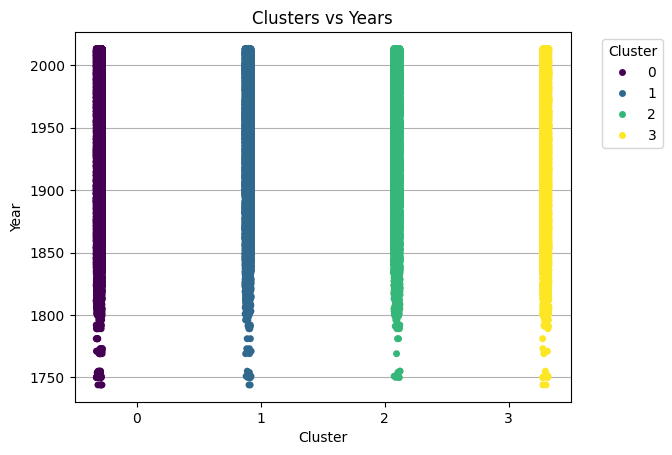

In [26]:
# Display the clusters over the years
sns.stripplot(
        data=encodedData,
        x='Cluster',
        y='year',
        hue='Cluster',
        palette='viridis',
        jitter=True,
        dodge=True
    )

plt.title('Clusters vs Years')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

# 9.Visualize the temps with respect to country, city, state

In [27]:
encodedData.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,City,Latitude,Longitude,State,LandAverageTemperature,LandAverageTemperatureUncertainty,...,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,z_score,year,month,day,Cluster
6,1744-05-01,0.406852,0.850101,27,9,0,0,10,0.598066,0.638661,...,0.392668,0.780306,0.921407,0.406852,0.850101,0.850101,1744,5,1,0
7,1744-06-01,0.499014,0.746347,27,9,0,0,10,0.754213,0.631349,...,0.393989,0.870996,0.969311,0.499014,0.746347,0.746347,1744,6,1,0
78,1750-05-01,0.398644,0.629868,27,9,0,0,10,0.626970,0.583501,...,0.376651,0.772229,0.963323,0.398644,0.629868,0.629868,1750,5,1,0
79,1750-06-01,0.514021,0.563798,27,9,0,0,10,0.763254,0.554131,...,0.372853,0.885763,0.845060,0.514021,0.563798,0.563798,1750,6,1,0
80,1750-07-01,0.594313,0.554010,27,9,0,0,10,0.909073,0.543674,...,0.370707,0.964774,0.847305,0.594313,0.554010,0.554010,1750,7,1,0


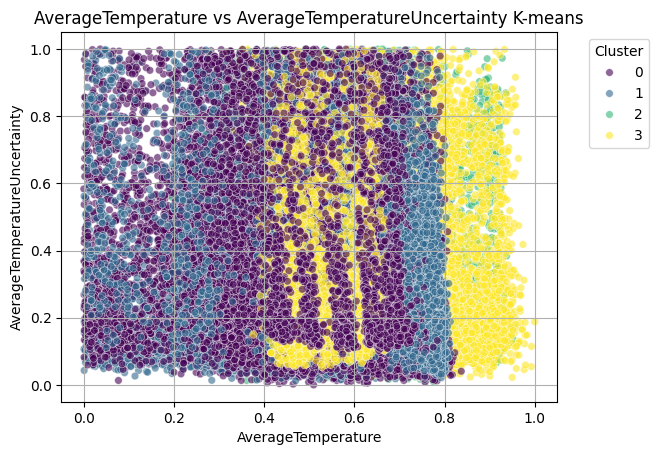

In [28]:
# Visualize the temps with respect to country, city, state
sns.scatterplot(
    data=encodedData,
    x='AverageTemperature',
    y='AverageTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('AverageTemperature vs AverageTemperatureUncertainty K-means')
plt.xlabel('AverageTemperature')
plt.ylabel('AverageTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

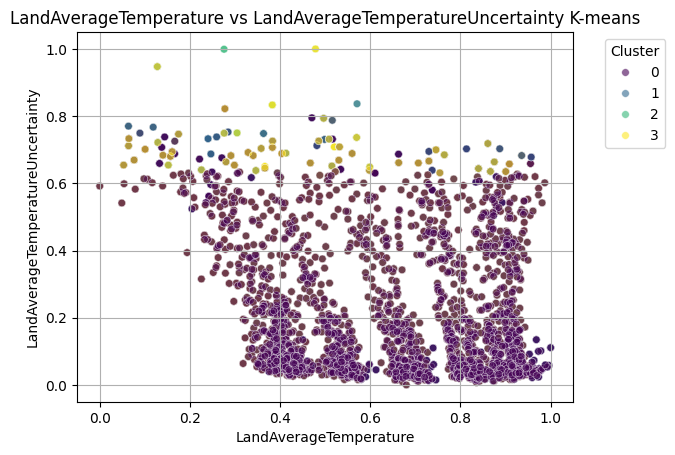

In [29]:
# Visualize the temps with respect to country, city, state
sns.scatterplot(
    data=encodedData,
    x='LandAverageTemperature',
    y='LandAverageTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('LandAverageTemperature vs LandAverageTemperatureUncertainty K-means')
plt.xlabel('LandAverageTemperature')
plt.ylabel('LandAverageTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

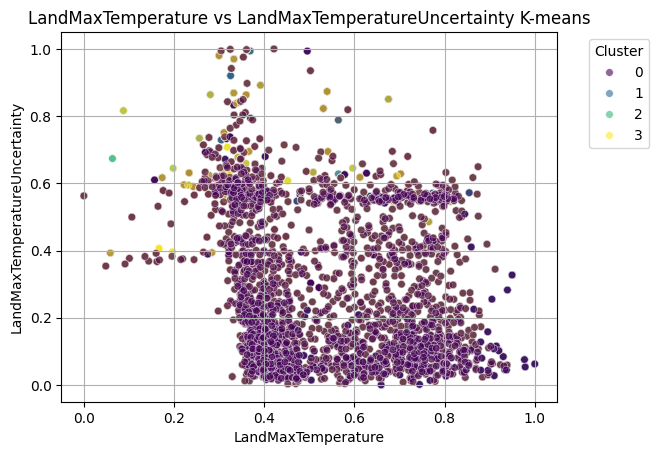

In [30]:
# Visualize the temps with respect to country, city, state
sns.scatterplot(
    data=encodedData,
    x='LandMaxTemperature',
    y='LandMaxTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('LandMaxTemperature vs LandMaxTemperatureUncertainty K-means')
plt.xlabel('LandMaxTemperature')
plt.ylabel('LandMaxTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

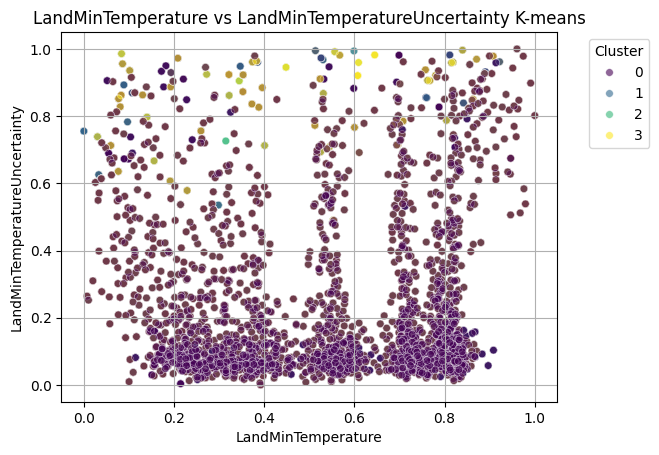

In [31]:
# Visualize the temps with respect to country, city, state
sns.scatterplot(
    data=encodedData,
    x='LandMinTemperature',
    y='LandMinTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('LandMinTemperature vs LandMinTemperatureUncertainty K-means')
plt.xlabel('LandMinTemperature')
plt.ylabel('LandMinTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

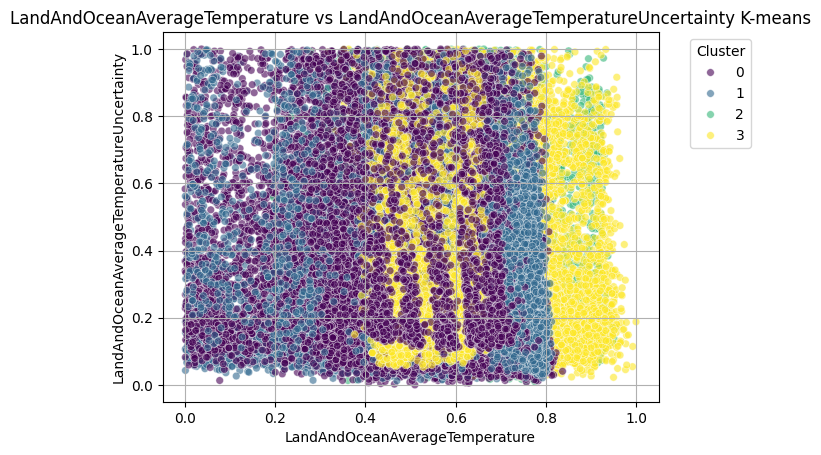

In [32]:
# LandAndOceanAverageTemperature
# Visualize the temps with respect to country, city, state
sns.scatterplot(
    data=encodedData,
    x='LandAndOceanAverageTemperature',
    y='LandAndOceanAverageTemperatureUncertainty',
    hue='Cluster',
    palette='viridis',
    s=30,
    alpha=0.6

)

plt.title('LandAndOceanAverageTemperature vs LandAndOceanAverageTemperatureUncertainty K-means')
plt.xlabel('LandAndOceanAverageTemperature')
plt.ylabel('LandAndOceanAverageTemperatureUncertainty')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [33]:
# silhoute score of the clustering
silhouette_avg = silhouette_score(encodedData[['City', 'Country', 'State']], kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4885034791678319


In [34]:
# count of data in each cluster
encodedData['Cluster'].value_counts()

,count
Cluster,
0,20697
2,16586
1,15229
3,14556


In [37]:
# download normalizedData to .csv
normalizedData.to_csv('normalizedData.csv', index=False)

# to be continued in Assignment 1 Data mining Part 3 to ensure the RAM does not crash :)